In [1]:
%matplotlib inline

from load import author_data
import numpy as np
from sklearn.cross_validation import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



import matplotlib.pyplot as plt
None


Bad key "axes.spines.right" on line 210 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
//anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get

In [2]:
import numpy as np
import marisa_trie
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import six

class MarisaCountVectorizer(CountVectorizer):

    # ``CountVectorizer.fit`` method calls ``fit_transform`` so
    # ``fit`` is not provided
    def fit_transform(self, raw_documents, y=None):
        X = super(MarisaCountVectorizer, self).fit_transform(raw_documents)
        X = self._freeze_vocabulary(X)
        return X

    def _freeze_vocabulary(self, X=None):
        if not self.fixed_vocabulary_:
            frozen = marisa_trie.Trie(six.iterkeys(self.vocabulary_))
            if X is not None:
                X = self._reorder_features(X, self.vocabulary_, frozen)
            self.vocabulary_ = frozen
            self.fixed_vocabulary_ = True
            del self.stop_words_
        return X

    def _reorder_features(self, X, old_vocabulary, new_vocabulary):
        map_index = np.empty(len(old_vocabulary), dtype=np.int32)
        for term, new_val in six.iteritems(new_vocabulary):
            map_index[new_val] = old_vocabulary[term]
        return X[:, map_index]

In [3]:
all_data = author_data(10)


In [4]:
len(all_data.keys())

48

In [6]:
def scores(all_data):
    document_label = []
    for label, docs in all_data.items():
        for d in docs:
            document_label.append((label, d))
    label_index = { label: i for i, label in enumerate(all_data.keys()) }
    index_label  = { i: label for i, label in enumerate(all_data.keys()) }
    vectorizer = CountVectorizer(min_df=2, stop_words='english')
    X = vectorizer.fit_transform(map(lambda x: x[1], document_label))
    Y = np.array(map(lambda x: label_index[x[0]], document_label))
    classifier = RandomForestClassifier()
    return np.mean(cross_val_score(classifier, X.toarray(), Y, cv=10))

In [ ]:
for g_size in [1,5,10,20,30]:
    print g_size, scores(author_data(g_size))

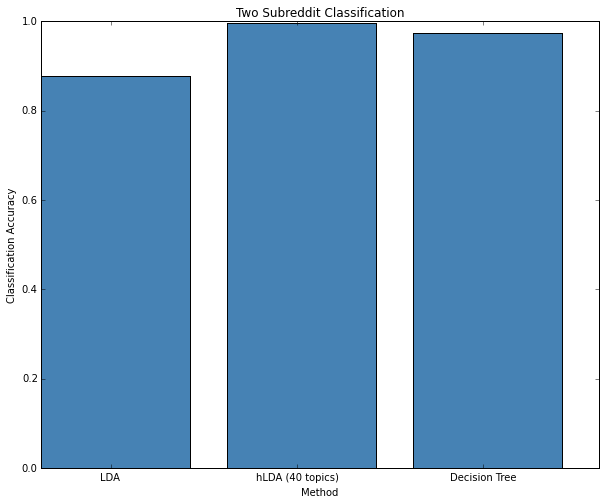

In [32]:
#anime vs. buildapc
data = {
'Decision Tree' : 0.97452149568428637,
'hLDA (40 topics)' : 0.9961538,
'LDA': 0.87692,
}
plt.figure(figsize=(10,8))

plot(data)
plt.title('Two Subreddit Classification ')
plt.xlabel('Method')
plt.ylabel('Classification Accuracy')
plt.show()

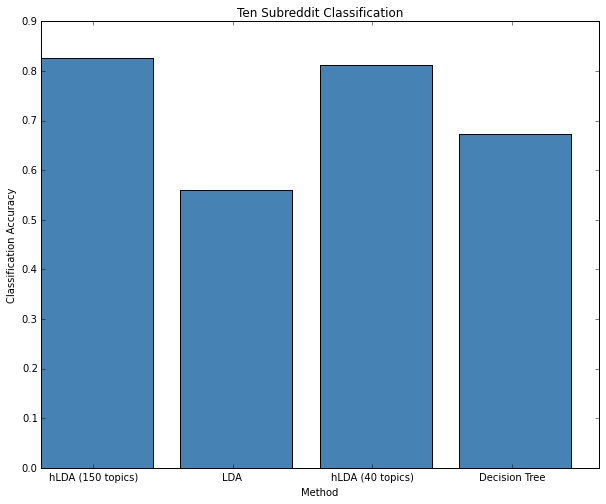

In [33]:
#10 subreddits
data = {
'hLDA (40 topics)' : 1386./1706,
'hLDA (150 topics)' : 1410./ 1706,
'LDA': 0.55920,
'Decision Tree' : 0.673854,
}
plt.figure(figsize=(10,8))

plot(data)
plt.title('Ten Subreddit Classification ')
plt.xlabel('Method')
plt.ylabel('Classification Accuracy')
plt.show()

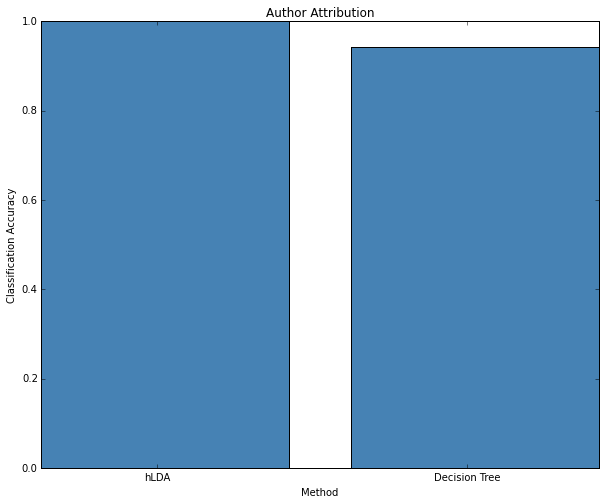

In [34]:
# authors
data = {
'hLDA' : 1.,
'Decision Tree' : 0.943089751,
}

plt.figure(figsize=(10,8))

plot(data)
plt.title('Author Attribution')
plt.xlabel('Method')
plt.ylabel('Classification Accuracy')
plt.show()

In [27]:
def plot(data):
    
    width = .75
    x = np.arange(len(data))
    plt.bar(x, data.values(), color='steelblue')
    plt.xticks(x + width / 2, data.keys())
